___

<a> <img src='DataWorkflow_LowRes.png' width="600"/></a>
___
# Data Workflow Crash Course

Please note, this is not meant to be a comprehensive overview of Python or programming or recomended data workflows. It is simply to give some examples of what your process may resemble.

**This notebook is just a potential reference, any and all of the example can be altered or a different approach taken altogether.**
____

<div align="center"><b>
    <h3>Other Notebooks</h3>
    <h4> <a href="0%20-%20Data%20Workflow%20Overview.ipynb">0 - Data Workflow Overview</a></h4>
    <h4> <a href="1 - Data Acquisition.ipynb">1 - Data Aquisition</a></h4>
    <h4> <a href="2 - Processing.ipynb">2 - Processing</a></h4>
    <h4> <a href="3 - Analysis.ipynb">3 - Analysis</a></h4>
    <h4> <a href="4 - Permanent Storage.ipynb">4 - Permanent Storage</a></h4>
</b><div align="center">

## Analysis
This is the stage where the data will be combined analyzed to find trends, significance, create charts, and determine experimental results. It can roughly be divided into (1) exploratory data analysis, (2) statistical tests of significance, and (3) modeling results.

[<img src="References/Statistical Test Decision Tree.png">](https://tales.nmc.unibas.ch/de/conducting-psychological-research-6/statistics-and-analyses-22/which-test-for-which-hypothesis-71)

### Import Libraries for Use

In [2]:
import pandas as pd
import datetime as dt
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

%matplotlib inline

### Exploratory Data Analysis (EDA)
This is the stage of performing initial investigations on data to look for patterns, anomalies, check assumptions, and determine hypothesis testing.

In [75]:
# Import dataframes of initial data
df_weather = pd.read_excel('Example_HourlyWeatherData.xlsx')
df_lab = pd.read_excel('Example_MultivariateExperiments.xlsx')
df_timeseries = pd.read_excel('Example_TimeSeriesProductivity.xlsx')

# Import processed data
df_daily_timeseries = pd.read_excel('Exports/Daily Timeseries.xlsx')
df_grouped_timeseries = pd.read_excel('Exports/Grouped Timeseries.xlsx')

# Drop air temperature from lab data
df_lab = df_lab.drop(['Air_Temp'], axis=1)

# Drop humidity from weather data
df_weather = df_weather.drop(['Rel_Hum'], axis=1)
df_daily_timeseries = df_daily_timeseries.drop(['Rel_Hum'], axis=1)

#### EDA on Laboratory Experiments
The below is only an example of some methods. There are many more and the style for each can be changed too.

In [38]:
# Summary Statistics
df = df_lab
df = df.groupby(['Experiment'], as_index=False).agg(
                      {'Productivity':['mean','std','median','min','max']})
df.head()

Experiment Productivity                                       
                     mean       std    median      min       max
0          1     5.166744  0.633044   4.98060  4.48254   6.47478
1          2     5.590989  0.746867   5.45664  4.54720   6.65028
2          3     5.934769  0.733365   6.06736  4.66720   6.88412
3          4     9.794018  1.243148  10.20138  7.81788  11.25012
4          5     9.789644  1.449662   9.97452  8.03772  11.62080

<AxesSubplot:xlabel='Experiment', ylabel='Productivity'>

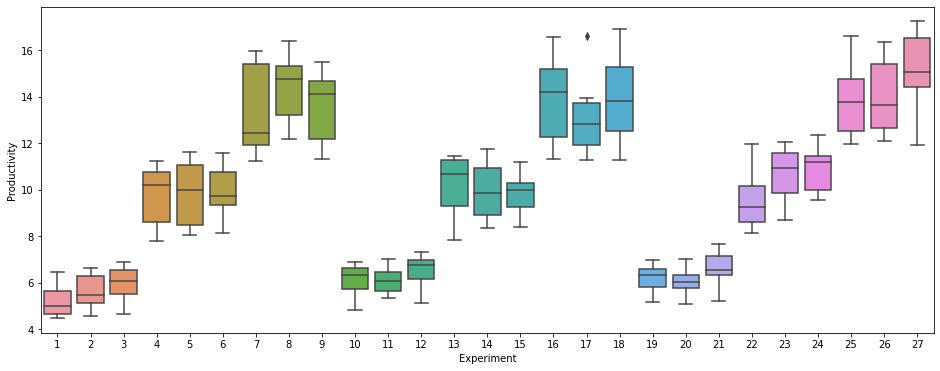

In [24]:
# Boxplot
df = df_lab
plt.figure(figsize=(16, 6))
sns.boxplot(x=df["Experiment"], y=df["Productivity"] )

<AxesSubplot:xlabel='Experiment', ylabel='Productivity'>

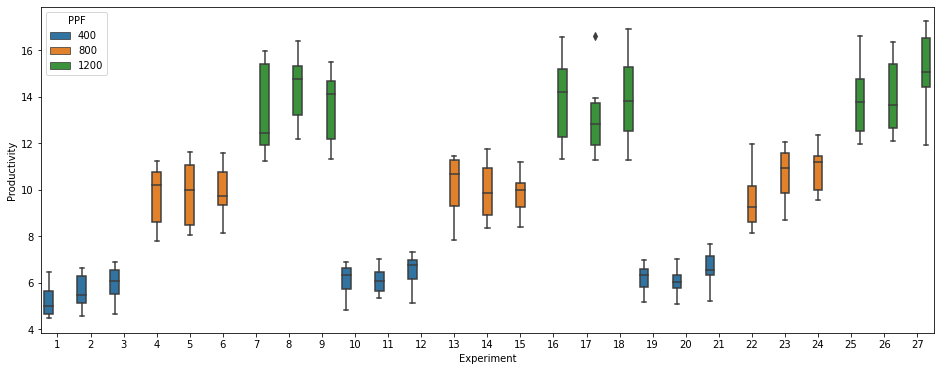

In [25]:
# Grouped Violin Plot
df = df_lab
plt.figure(figsize=(16, 6))
sns.boxplot(x=df["Experiment"], y=df["Productivity"], hue=df["PPF"])

<AxesSubplot:xlabel='Experiment', ylabel='Productivity'>

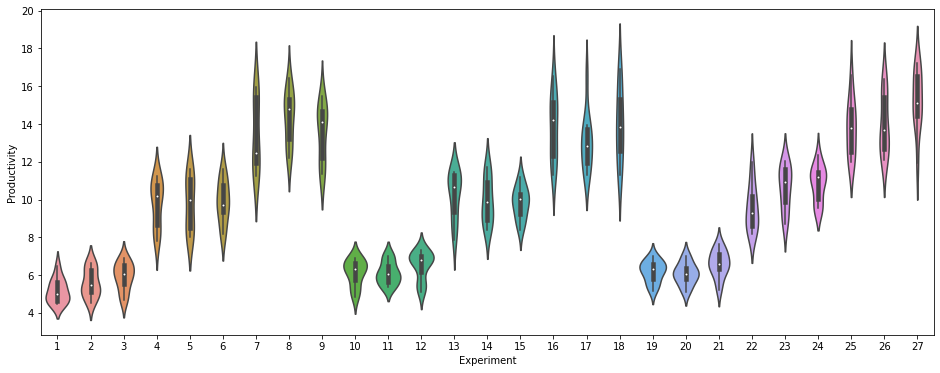

In [26]:
# Violin Plot
df = df_lab
plt.figure(figsize=(16, 6))
sns.violinplot(x=df["Experiment"], y=df["Productivity"] )

<AxesSubplot:xlabel='Experiment', ylabel='Productivity'>

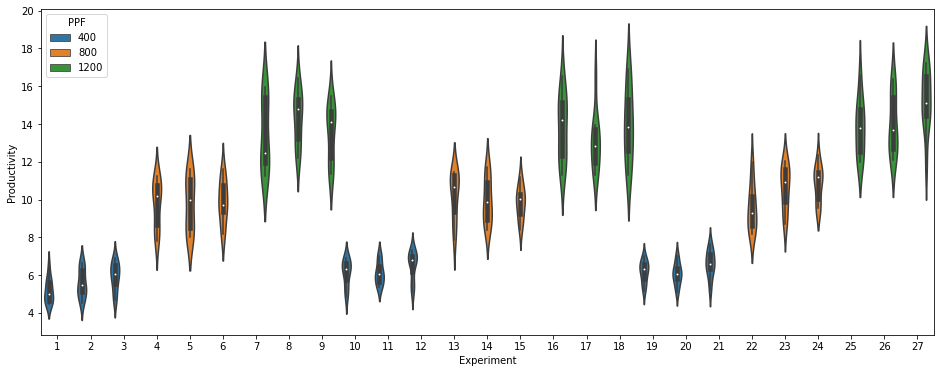

In [27]:
# Grouped Violin Plot
df = df_lab
plt.figure(figsize=(16, 6))
sns.violinplot(x=df["Experiment"], y=df["Productivity"], hue=df["PPF"])

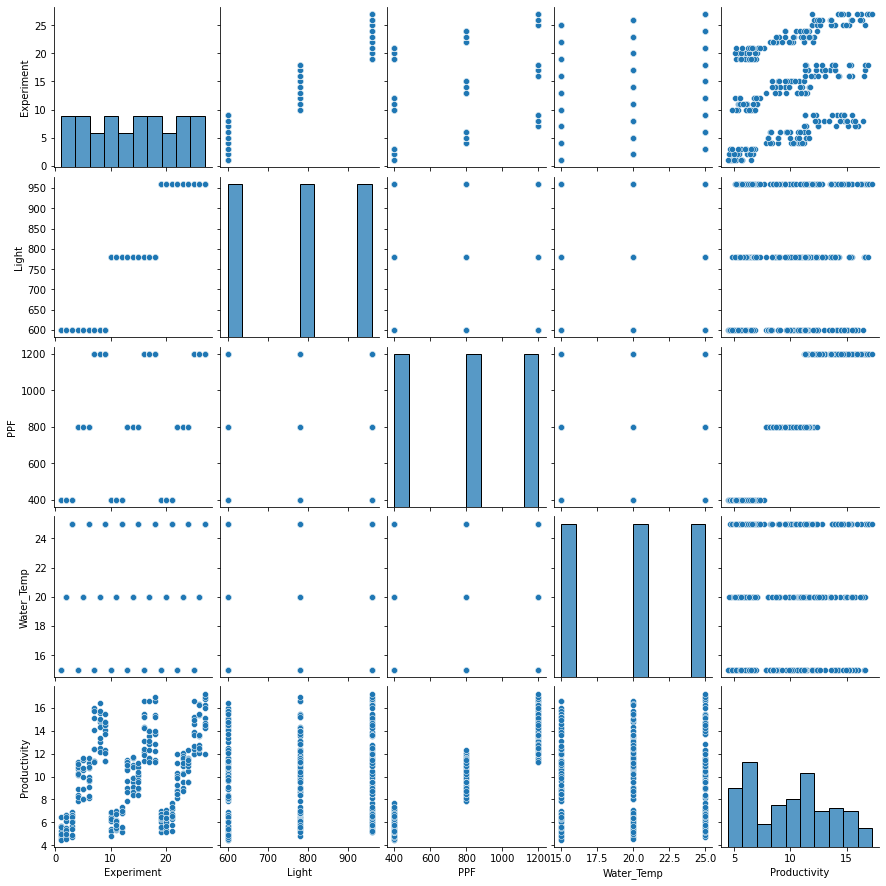

In [28]:
# Pairplot
df = df_lab
sns.pairplot(df)

<AxesSubplot:>

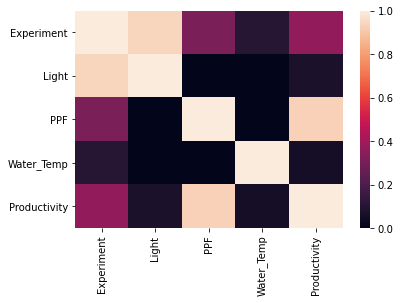

In [31]:
# Pairplot
df = df_lab
sns.heatmap(df.corr())

In [30]:
# Correlation
df = df_lab
df.corr()

,Experiment,Light,PPF,Water_Temp,Productivity
Experiment,1.000000,9.434564e-01,3.144855e-01,1.048285e-01,0.366034
Light,0.943456,1.000000e+00,-4.338218e-16,3.604549e-16,0.071518
PPF,0.314485,-4.338218e-16,1.000000e+00,3.760852e-16,0.930779
Water_Temp,0.104828,3.604549e-16,3.760852e-16,1.000000e+00,0.055741
Productivity,0.366034,7.151772e-02,9.307790e-01,5.574076e-02,1.000000


#### EDA on Time Series Data
The below is only an example of some methods. There are many more and the style for each can be changed too.

In [81]:
# Summary Statistics by Month
df = df_daily_timeseries

df = df.set_index('Date').groupby(pd.Grouper(freq='M')).agg(
                      {'Productivity':['mean','std','median','min','max']})

df.head()

Productivity                                           
                   mean       std     median        min        max
Date                                                              
2021-01-31     6.869976  0.588092   6.889699   6.229324   7.719980
2021-02-28     8.132964  0.409887   8.279302   7.467267   8.505984
2021-03-31    10.708940  1.331809  10.743781   8.890367  12.724779
2021-04-30    12.930935  1.245235  12.545123  11.106326  14.556634
2021-05-31    14.928978  1.657192  14.418946  12.545123  16.692914

In [80]:
# Summary Statistics by Week
df = df_daily_timeseries

df = df.set_index('Date').groupby(pd.Grouper(freq='W')).agg(
                      {'Productivity':['mean','std','median','min','max']})

df.head()

Productivity                                   
                   mean  std    median       min       max
Date                                                      
2021-01-03     7.423671  0.0  7.423671  7.423671  7.423671
2021-01-10     6.889699  0.0  6.889699  6.889699  6.889699
2021-01-17     6.403604  0.0  6.403604  6.403604  6.403604
2021-01-24     6.229324  0.0  6.229324  6.229324  6.229324
2021-01-31     7.719980  0.0  7.719980  7.719980  7.719980

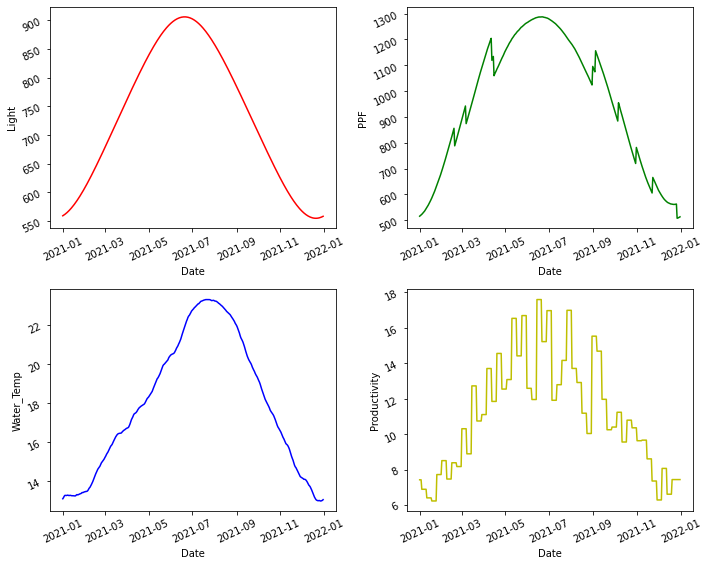

In [83]:
# Create time series subplots to compare values
df = df_daily_timeseries

fig,ax =  plt.subplots( 2, 2, figsize = ( 10, 8))
  
sns.lineplot(x = "Date", y = "Light", color = 'r', data = df, ax = ax[0][0])
  
ax[0][0].tick_params(labelrotation = 25)
sns.lineplot( x = "Date", y = "PPF", color = 'g', data = df, ax = ax[0][1])
  
ax[0][1].tick_params(labelrotation = 25)
sns.lineplot(x = "Date", y = "Water_Temp", color = 'b', data = df, ax = ax[1][0])
  
ax[1][0].tick_params(labelrotation = 25)
  
sns.lineplot(x = "Date", y = "Productivity", color = 'y', data = df, ax = ax[1][1])
  
ax[1][1].tick_params(labelrotation = 25)
fig.tight_layout(pad = 1.2)

<AxesSubplot:>

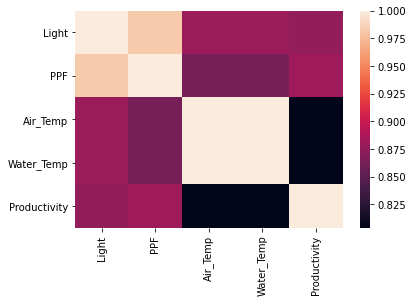

In [76]:
# Pairplot
df = df_daily_timeseries
sns.heatmap(df.corr())

In [77]:
# Correlation
df = df_daily_timeseries
df.corr()

,Light,PPF,Air_Temp,Water_Temp,Productivity
Light,1.000000,0.982646,0.880221,0.880221,0.875788
PPF,0.982646,1.000000,0.863670,0.863670,0.880586
Air_Temp,0.880221,0.863670,1.000000,1.000000,0.803522
Water_Temp,0.880221,0.863670,1.000000,1.000000,0.803522
Productivity,0.875788,0.880586,0.803522,0.803522,1.000000


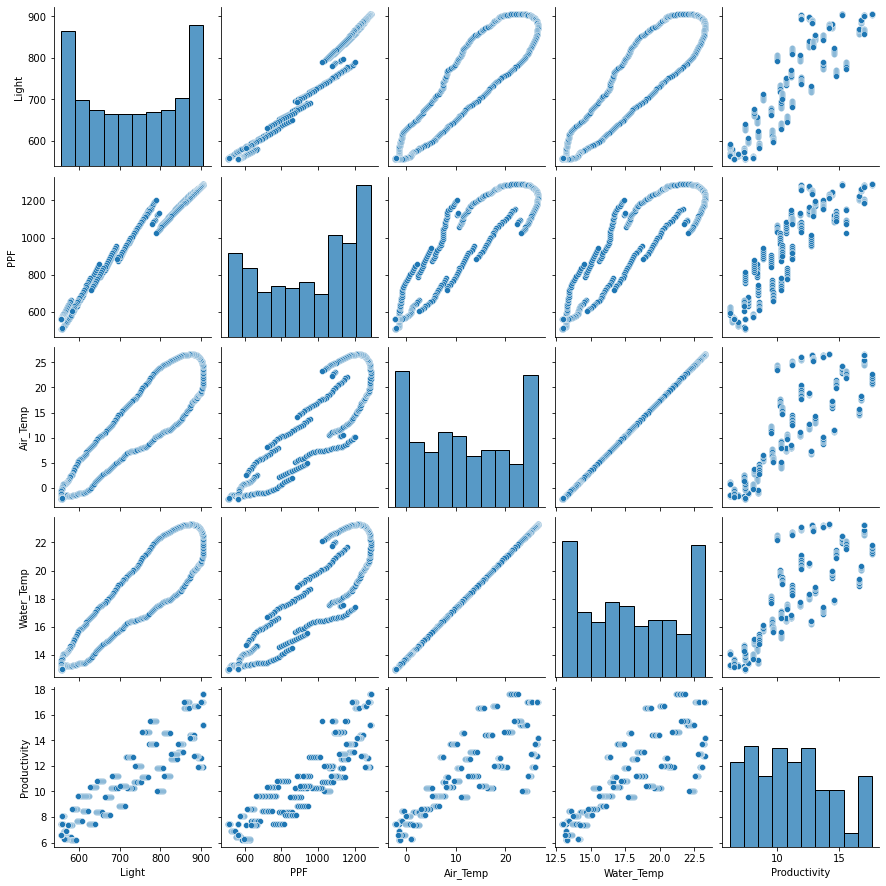

In [78]:
# Pairplot
df = df_daily_timeseries
sns.pairplot(df)

### Statistical and Model Evaluation
This is the stage of performing statistical and other modeling tests to report on the data.

#### Linear Regression Model on Laboratory Experiments
This is based on training a linear regression model. I will split up the data into an X array that contains the features to train on, and a y array with the target variable. 

In [47]:
df = df_lab

# X and y Arrays
X = df[['Light','PPF','Water_Temp']]
y = df['Productivity']

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Creating and training a model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

# Model Evaluation
print('The intercept is: ' + str(lm.intercept_))

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

The intercept is: 0.42745621680496626


In [48]:
coeff_df

,Coefficient
Light,0.001213
PPF,0.009604
Water_Temp,0.044238


Interpreting the coefficients:
* Holding all other features fixed, a 1 unit increase in **Light Duration (min)** is associated with an **increase of 0.001 in productivity (g m<sup>-2</sup> day<sup>-1</sup>)**.
* Holding all other features fixed, a 1 unit increase in **PPF (µmol m<sup>-2</sup> s<sup>-1</sup>)** is associated with an **increase of 0.001 in productivity (g m<sup>-2</sup> day<sup>-1</sup>)**.
* Holding all other features fixed, a 1 unit increase in **Water Temperature (°C)** is associated with an **increase of 0.044 in productivity (g m<sup>-2</sup> day<sup>-1</sup>)**.

Note that this prediction is very close to the original model for our data aquisition. There is variance due to the randomness intentionally generated. Real biological data will be much messier.

In [49]:
# Predictions from the Model
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

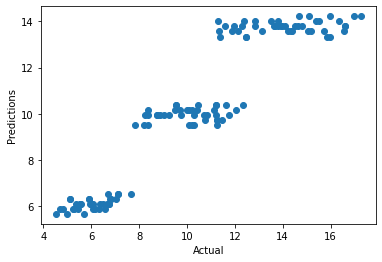

In [50]:
# Plot predictions vs. actual data
plt.scatter(y_test,predictions)
plt.xlabel("Actual")
plt.ylabel("Predictions")

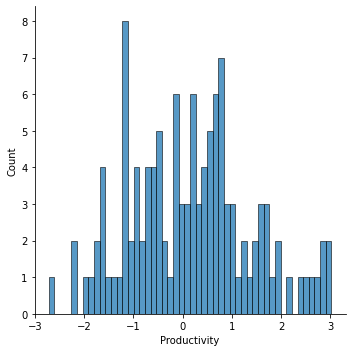

In [52]:
# Residual histogram
sns.displot((y_test-predictions),bins=50)

In [53]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.0190825156964152
MSE: 1.5842344937645212
RMSE: 1.258663773119939


##### Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

#### One Way ANOVA on Laboratory Experiments
This is based on the example from [Python for Data Science](https://www.pythonfordatascience.org/anova-python/).

In [60]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = df_lab

"""
The function below was created specifically for the one-way ANOVA table results returned for Type II sum of squares
"""

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

model = ols('Productivity ~ Experiment', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
Experiment,475.257586,1.0,475.257586,45.639,7.576687e-11,0.133981,0.130661
Residual,3071.955736,295.0,10.413409,NaN,NaN,NaN,NaN


#### Tukey Honestly Significant Difference (HSD) on Laboratory Experiments
This is based on the example from [Python for Data Science](https://www.pythonfordatascience.org/anova-python/#post-hoc).

In [62]:
import statsmodels.stats.multicomp as mc

df = df_lab

comp = mc.MultiComparison(df['Productivity'], df['Experiment'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.4242,0.9,-1.5291,2.3776,False
1,3,0.768,0.9,-1.1853,2.7214,False
1,4,4.6273,0.001,2.6739,6.5806,True
1,5,4.6229,0.001,2.6696,6.5762,True
1,6,4.7298,0.001,2.7765,6.6832,True
1,7,8.2934,0.001,6.3401,10.2468,True
1,8,9.189,0.001,7.2357,11.1424,True
1,9,8.378,0.001,6.4247,10.3313,True
1,10,0.9697,0.9,-0.9837,2.923,False
1,11,0.9442,0.9,-1.0091,2.8976,False


C:\Users\nguymon\Anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


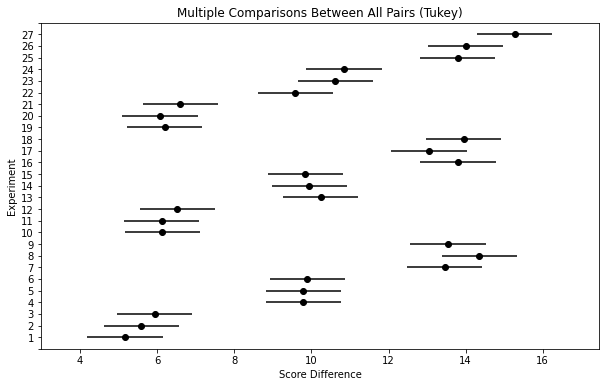

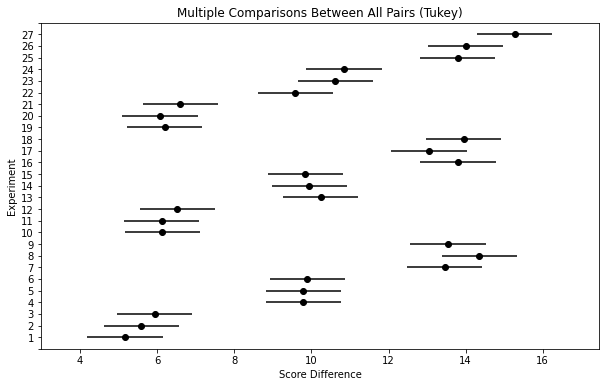

In [63]:
post_hoc_res.plot_simultaneous(ylabel= "Experiment", xlabel= "Score Difference")

#### Time-Series Analysis
For analyzing the time-series data there are a few main methods. I'll list a few and they're referenced in the main README on GitHub:
* To use ANOVA you can group by time periods such as months or other values.
* Two-way and above ANOVA methods could be used.
* The same linear regression model as above could be used to generate predictions.
* Time-series smoothing and decomposition could be used.
Here are a couple additional guides you may find useful:
* [A Guide to Time Series Analysis in Python](https://www.machinelearningplus.com/time-series/time-series-analysis-python/)
* [Time Series Analysis in Python – A Comprehensive Guide with Examples](https://builtin.com/data-science/time-series-python)

[<img src="https://imgs.xkcd.com/comics/curve_fitting.png">](https://xkcd.com/2048/)